In [157]:
import glob, os
import pandas as pd
import seaborn as sns
import numpy as np

In [158]:
def get_precision_recall(A, B):
    retrieved_list = A['opcs'].drop_duplicates()
    target_list = B['opcs'].str.replace('.','').drop_duplicates()
    
    total_codes_retrieved = len(retrieved_list)
    target_codes_retrieved = sum(retrieved_list.isin(target_list))
    total_target_codes = len(target_list)
    

    # precision = relevant retrieved instances / all retrieved instances
    # 'how many of the retrieved codes were in CORECT-R'
    precision = ( target_codes_retrieved / total_codes_retrieved )
    print('   Precision: ',round(precision,4), '  ',target_codes_retrieved,' out of ',total_codes_retrieved,'codes retrieved were relevant')

    # recall = relevant retrieved instances / all relevant instances
    # 'how many of the CORECT-R codes were retrieved?'
    recall = ( target_codes_retrieved / total_target_codes )
    print('   Recall:    ',round(recall,4), '  ',target_codes_retrieved,' out of ',total_target_codes,' CORECT codes found')

    return precision, recall

In [159]:
# Get codelists to compare against
comparison_sets = [['appendix', 'hdruk/Appendicitis'], 
                   ['cataract', 'hdruk/Cataract'], 
                   ['glaucoma', 'hdruk/Glaucoma'],
                   ['colorectal','CORECT_dictionary'],
                   ['lung','lung_dictionary']
                   ]

colnames = ['Query 1','Query 2','Query 3','Query 4']
length_matrix = pd.DataFrame(index=[i[0] for i in comparison_sets], columns = colnames)
recall_matrix    = pd.DataFrame(index=[i[0] for i in comparison_sets], columns = colnames)
precision_matrix = pd.DataFrame(index=[i[0] for i in comparison_sets], columns = colnames)


In [160]:
os.getcwd()

'/Users/oweyer/Documents/ontologyFilter/src'

In [161]:


# Get source codelists

for s in comparison_sets:
    print('--- Comparing '+s[0]+' codelist against '+s[1]+' standard')
    files = sorted( list( glob.glob("codelists/output/omop/query_"+s[0]+"*_opcs.csv") ) )
    print(files)

    try:
        benchmark_list = pd.read_csv('codelists/'+s[1]+".csv")

        if (s[1] == 'CORECT_dictionary'):
            benchmark_list = benchmark_list[ ~pd.isna(benchmark_list['CorectRMapping']) ]
            benchmark_list = benchmark_list[~benchmark_list['opcs'].str.startswith(('Z','Y')) ]

        i=0

        for f in files: 
            print(f)
            codelist = pd.read_csv(f)
            p, r = get_precision_recall(codelist, benchmark_list)

            length_matrix.loc[s[0]][i] = len(codelist)
            precision_matrix.loc[s[0]][i] = round(p,8)
            recall_matrix.loc[s[0]][i] = round(r,8)

            i = i + 1

    except FileNotFoundError as e:
        print(e)
# Create matrix

--- Comparing appendix codelist against hdruk/Appendicitis standard
['codelists/output/omop/query_appendix_0_snomed_opcs.csv', 'codelists/output/omop/query_appendix_1_snomed_opcs.csv', 'codelists/output/omop/query_appendix_2_snomed_opcs.csv', 'codelists/output/omop/query_appendix_3_snomed_opcs.csv']
codelists/output/omop/query_appendix_0_snomed_opcs.csv
   Precision:  0.193    11  out of  57 codes retrieved were relevant
   Recall:     0.7857    11  out of  14  CORECT codes found
codelists/output/omop/query_appendix_1_snomed_opcs.csv
   Precision:  0.2245    11  out of  49 codes retrieved were relevant
   Recall:     0.7857    11  out of  14  CORECT codes found
codelists/output/omop/query_appendix_2_snomed_opcs.csv
   Precision:  0.7333    11  out of  15 codes retrieved were relevant
   Recall:     0.7857    11  out of  14  CORECT codes found
codelists/output/omop/query_appendix_3_snomed_opcs.csv
   Precision:  0.7857    11  out of  14 codes retrieved were relevant
   Recall:     0.785

In [162]:
display(precision_matrix)
display(recall_matrix)

,Query 1,Query 2,Query 3,Query 4
appendix,0.192982,0.22449,0.733333,0.785714
cataract,0.005511,0.006225,0.8,0.791667
glaucoma,0.004746,0.004975,0.063725,0.06044
colorectal,0.505376,0.477612,0.569565,0.54717
lung,0.127273,0.241379,0.255814,0.366667


,Query 1,Query 2,Query 3,Query 4
appendix,0.785714,0.785714,0.785714,0.785714
cataract,0.625,0.59375,0.625,0.59375
glaucoma,0.619048,0.52381,0.619048,0.52381
colorectal,0.719388,0.489796,0.668367,0.443878
lung,0.736842,0.736842,0.578947,0.578947


<Axes: >

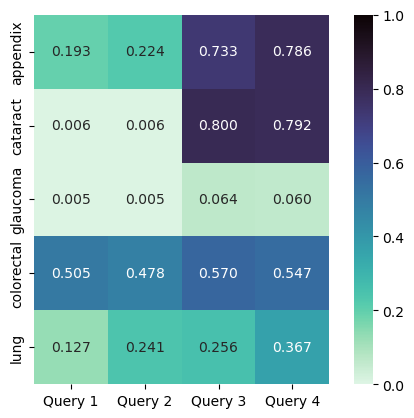

In [163]:
display( sns.heatmap(data=precision_matrix.astype(float), vmin=0, vmax=1, cmap='mako_r', square=True, annot=True, fmt=".3f") )

<Axes: >

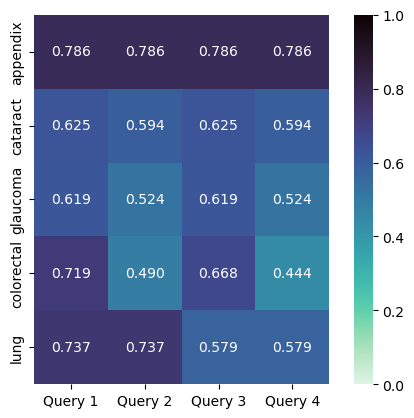

In [164]:
display( sns.heatmap(data=recall_matrix.astype(float), vmin=0, vmax=1, cmap='mako_r', square=True, annot=True, fmt=".3f") )

<Axes: >

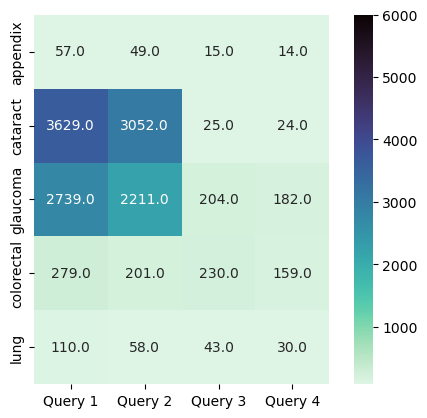

In [165]:
display( sns.heatmap(data=length_matrix.astype(float), vmin=75, vmax=6000, cmap='mako_r', square=True, annot=True, fmt=".1f") )

In [166]:
length_matrix.to_csv('visualisation/stats/length_matrix.csv')
precision_matrix.to_csv('visualisation/stats/precision_matrix.csv')
recall_matrix.to_csv('visualisation/stats/recall_matrix.csv')